In [ ]:
try:
    import jax
except:
    %pip install -qq jax
    import jax

try:
    import distrax
except:
    %pip install -qq distrax
    import distrax

try:
    import matplotlib.pyplot as plt
except:
    %pip install -qq matplotlib.pyplot
    import matplotlib.pyplot as plt

try:
    from ssm import first_state, next_state, out, hmm
except:
    %pip install -qq git+https://github.com/dhruvpatel144/ssm.git
    from ssm import first_state, next_state, out, hmm

     |████████████████████████████████| 272 kB 25.8 MB/s 
     |████████████████████████████████| 72 kB 674 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 1.1 MB 50.3 MB/s 


In [ ]:
l = 100  # length of chain
n = 1  # number of samples
k = 2  # number of states in sample
p = 6  # possible outcomes
pi = jax.numpy.array([0.67, 0.33])  # prior matrix of k
A = jax.numpy.array([[0.9, 0.1], [0.3, 0.7]])  # transition matrix of k*k
B = jax.numpy.array(
    [[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.167], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]
)  # emission matrix of k*p

In [ ]:
# sequence of probabilities for the next state and and the observation (generated from a normal distribution)
key = jax.random.PRNGKey(6)
x = jax.random.uniform(key=key, shape=(l,))
key = jax.random.PRNGKey(5)
y = jax.random.uniform(key=key, shape=(l,))

In [ ]:
for i in range(n):
    sample, outcome = hmm(A, B, pi, x, y, p, k, l)
    print(sample)
    print(outcome)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0.]
[5. 5. 2. 4. 4. 4. 1. 2. 5. 4. 3. 3. 4. 0. 0. 5. 3. 5. 5. 1. 4. 0. 1. 1.
 3. 4. 1. 3. 5. 1. 3. 4. 1. 4. 4. 4. 1. 2. 5. 3. 3. 3. 3. 1. 1. 5. 5. 5.
 5. 0. 1. 4. 1. 5. 5. 5. 5. 4. 2. 5. 2. 1. 3. 4. 2. 5. 0. 5. 5. 2. 4. 5.
 0. 2. 2. 0. 3. 5. 5. 3. 5. 4. 1. 2. 3. 4. 4. 0. 0. 2. 5. 5. 0. 2. 2. 2.
 3. 4. 3. 5.]


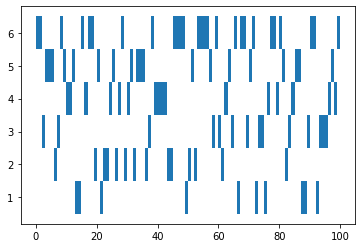

In [ ]:
observed_tuple = [[] for i in range(p)]
for i in range(l):
    observed_tuple[int(outcome[i])].append(tuple([i, 1]))
for i in range(p):
    plt.broken_barh(observed_tuple[i], (i + 0.5, 1), facecolors="tab:blue")
plt.show()